In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

2024-05-03 05:58:53.908877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 05:58:53.909056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 05:58:54.071733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [5]:
data_gen=ImageDataGenerator(rescale=(1/255))

In [6]:
training_data=data_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/train",
                                          target_size=(64,64),batch_size=64,
                                          class_mode="binary")

Found 5216 images belonging to 2 classes.


In [7]:
print(len(training_data.labels))
print(len(training_data))

5216
82


In [6]:
testing_data=data_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/test",
                                          target_size=(64,64),batch_size=64,
                                          class_mode="binary")

Found 624 images belonging to 2 classes.


In [7]:
testing_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=3))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x=training_data,validation_data=testing_data,epochs=2)

In [10]:
import keras_tuner as kt

In [16]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Conv2D(filters=hp.Int("filters1", 8, 65, step=8),
                     kernel_size=hp.Int("kernel_size1", 3, 18, step=3),
                     activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=hp.Choice("pool_size1", [2, 3, 4])))  # Hyperparameter for pool size
    model.add(Conv2D(filters=hp.Int("filters2", 8, 57, step=8),
                     kernel_size=hp.Int("kernel_size2", 3, 18, step=3),
                     activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=hp.Choice("pool_size2", [2, 3, 4])))  # Hyperparameter for pool size
    model.add(tf.keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int("units1", 8, 200, step=20),
                                  activation="relu",
                                  kernel_regularizer=l2(0.06)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(keras.layers.Dense(units=hp.Int("units2", 8, 200, step=20),
                                  activation="relu",
                                  kernel_regularizer=l2(0.05)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=hp.Choice("optimizer", ["adam", "sgd", "rmsprop", "adadelta"]),
                  loss="binary_crossentropy",
                  metrics=["acc"])
    return model

In [17]:
build_model(kt.HyperParameters())

<Sequential name=sequential_1, built=False>

In [18]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_acc",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="/kaggle/working/my_dir",
    project_name="XRAY_Pnemonia_model",
)

In [19]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
filters1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 65, 'step': 8, 'sampling': 'linear'}
kernel_size1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 18, 'step': 3, 'sampling': 'linear'}
pool_size1 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
filters2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 57, 'step': 8, 'sampling': 'linear'}
kernel_size2 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 18, 'step': 3, 'sampling': 'linear'}
pool_size2 (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 200, 'step': 20, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 200, 'step': 20, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], '

In [20]:
tuner.search(x=training_data,epochs=6,validation_data=testing_data)

Trial 5 Complete [00h 11m 03s]
val_acc: 0.7083333432674408

Best val_acc So Far: 0.7083333432674408
Total elapsed time: 00h 53m 25s


In [21]:
model=tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adadelta', because it has 2 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [22]:
tuner.get_best_hyperparameters()[0].values

{'filters1': 40,
 'kernel_size1': 3,
 'pool_size1': 3,
 'filters2': 32,
 'kernel_size2': 18,
 'pool_size2': 2,
 'units1': 88,
 'units2': 108,
 'optimizer': 'adadelta'}

In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 40)     │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 40)     │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 32)       │       414,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 88)             │         2,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 88)             │           352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 108)            │         9,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 108)            │           432 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 108)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           109 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,569 (1.64 MB)

 Trainable params: 429,033 (1.64 MB)

 Non-trainable params: 536 (2.09 KB)

In [24]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=20,mode='auto',baseline=None,restore_best_weights=True
                       ,start_from_epoch=10)

In [25]:
model.fit(x=training_data,validation_data=testing_data,initial_epoch=6,epochs=100,callbacks=[callback])

Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 61s 611ms/step - acc: 0.6760 - loss: 8.2910 - val_acc: 0.8013 - val_loss: 8.1589
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 552ms/step - acc: 0.6969 - loss: 8.2532 - val_acc: 0.8157 - val_loss: 8.1201
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 563ms/step - acc: 0.7093 - loss: 8.2241 - val_acc: 0.8189 - val_loss: 8.0980
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 51s 573ms/step - acc: 0.7224 - loss: 8.2022 - val_acc: 0.8221 - val_loss: 8.0741
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 557ms/step - acc: 0.7263 - loss: 8.1929 - val_acc: 0.8237 - val_loss: 8.0535
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 559ms/step - acc: 0.7368 - loss: 8.1503 - val_acc: 0.8269 - val_loss: 8.0334
Epoch 13/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 50s 557ms/step - acc: 0.7478 - loss: 8.1190 - val_acc: 0.8333 - val_loss: 8.0149
Epoch 14/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 550ms/step - acc: 0.7414 - loss: 8.1190 - val_acc: 0.8333 - val_loss: 7.9996
Epoch 15/100
82/82 ━━━━━━━━━━━━━━━━

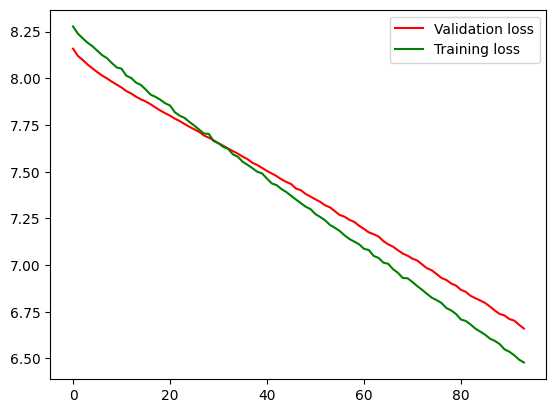

In [27]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_loss'],c="red",label='Validation loss')
plt.plot(model.history.history['loss'],c="green",label='Training loss')
plt.legend()

In [28]:
validation_data=data_gen.flow_from_directory("/kaggle/input/chest-xray-pneumonia/chest_xray/val",
                                          target_size=(64,64),batch_size=64,
                                          class_mode="binary")

Found 16 images belonging to 2 classes.


In [29]:
y_pred = model.predict(validation_data)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


In [34]:
len(validation_data.filenames)

16

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, \
    average_precision_score, confusion_matrix, classification_report
import seaborn as sns

In [36]:
y_val=validation_data.labels

In [37]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)

# Calculate Precision-Recall curve and score
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)

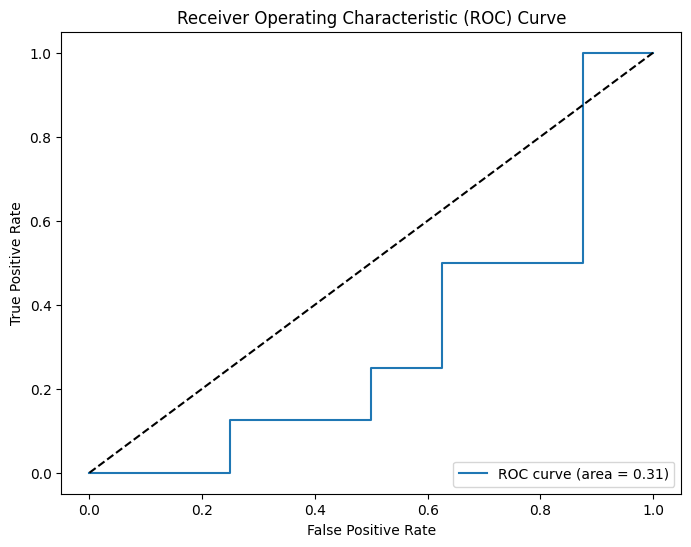

In [38]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

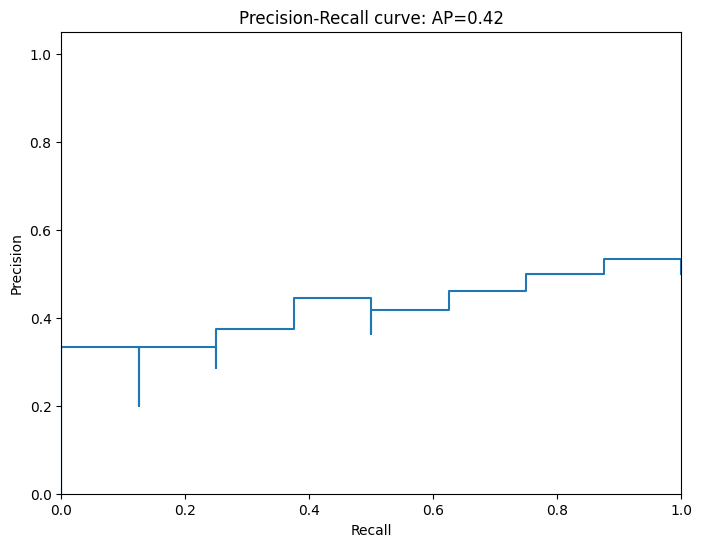

In [39]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(pr_auc))
plt.show()


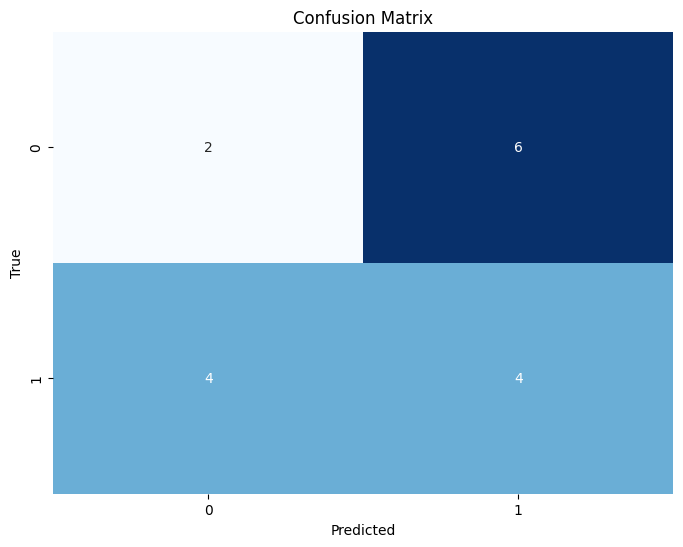

In [40]:
# Plot Confusion Matrix
y_pred_binary = np.round(y_pred)
cm = confusion_matrix(y_val, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.40      0.50      0.44         8

    accuracy                           0.38        16
   macro avg       0.37      0.38      0.37        16
weighted avg       0.37      0.38      0.37        16



In [47]:
import os
directory_path = '/kaggle/working/my_model'
if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")
# Example usage:
directory_path = '/kaggle/working/my_model'

model.save('/kaggle/working/my_model/my_model.h5')

Directory '/kaggle/working/my_model' created successfully.


# Training Model Further
I interested in know how much the model will be able to learn can continue training further by running the next few code Happy Coding!

In [48]:
import numpy as np
import tensorflow as tf

# Set random seed for numpy
np.random.seed(42)

# Set random seed for Python's built-in random module
import random
random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

In [49]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_model.h5')

# Now you can use loaded_model for predictions or further training

In [51]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=20,mode='auto',baseline=None,restore_best_weights=True
                       ,start_from_epoch=100)
loaded_model.compile(optimizer="adadelta",metrics=["acc"],loss="binary_crossentropy")

In [ ]:
loaded_model.fit(x=training_data,validation_data=testing_data,initial_epoch=100,epochs=150,callbacks=[callback])

Epoch 101/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 65s 652ms/step - acc: 0.9412 - loss: 6.4711 - val_acc: 0.8157 - val_loss: 6.6513
Epoch 102/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 550ms/step - acc: 0.9387 - loss: 6.4512 - val_acc: 0.8157 - val_loss: 6.6394
Epoch 103/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 545ms/step - acc: 0.9424 - loss: 6.4305 - val_acc: 0.8061 - val_loss: 6.6411
Epoch 104/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 83s 554ms/step - acc: 0.9412 - loss: 6.4236 - val_acc: 0.8093 - val_loss: 6.6248
Epoch 105/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 546ms/step - acc: 0.9478 - loss: 6.4091 - val_acc: 0.8125 - val_loss: 6.6125
Epoch 106/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 549ms/step - acc: 0.9455 - loss: 6.3985 - val_acc: 0.8141 - val_loss: 6.6034
Epoch 107/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 538ms/step - acc: 0.9426 - loss: 6.3867 - val_acc: 0.8125 - val_loss: 6.5877
Epoch 108/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 553ms/step - acc: 0.9357 - loss: 6.3782 - val_acc: 0.8109 - val_loss: 6.5754
Epoch 109/150
52/82 ━━━━